<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기초통계정보 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**2) 정규화**

In [6]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [8]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# 2단계: 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [10]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [12]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  8]
 [ 7 60]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.88      0.90      0.89        67

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.

In [13]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# 2단계: 선언하기
model = DecisionTreeClassifier(max_depth=10, random_state=2022)

In [15]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [16]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [17]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70 13]
 [15 52]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        83
           1       0.80      0.78      0.79        67

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



## 4.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.

In [18]:
# 1단계: 불러오기

from sklearn.ensemble import RandomForestClassifier

In [19]:
# 2단계: 선언하기

model = RandomForestClassifier(max_depth=10, 
                               random_state=2022, 
                               n_estimators=50)

In [20]:
# 3단계: 학습하기

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2022)

In [21]:
# 4단계: 예측하기

y_pred = model.predict(x_test)

In [22]:
# 5단계: 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80  3]
 [ 9 58]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        83
           1       0.95      0.87      0.91        67

    accuracy                           0.92       150
   macro avg       0.92      0.91      0.92       150
weighted avg       0.92      0.92      0.92       150



In [23]:
model.get_params()

# 아래의 사항들은 만져볼 필요가 있다
# max_depth, max_features
# min_samples_leaf, min_samples_split
# n_estimators, n_jobs

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

In [24]:
model.n_estimators += 10

In [25]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=60, random_state=2022)

## 4.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.

In [26]:
# xgboost 설치
# !pip install xgboost

In [27]:
# !pip list

In [28]:
# 1단계: 불러오기

from xgboost import XGBClassifier

In [29]:
# 2단계: 선언하기

model = XGBClassifier(max_depth=10, random_state=2022, n_estimators=20)

In [30]:
# 3단계: 학습하기

model.fit(x_train, y_train)

[00:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# 4단계: 예측하기

y_pred = model.predict(x_test)

In [32]:
# 5단계: 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  6]
 [ 8 59]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        83
           1       0.91      0.88      0.89        67

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.91       150
weighted avg       0.91      0.91      0.91       150



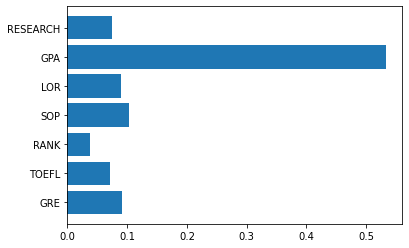

In [33]:
# 6단계

plt.barh(list(x), model.feature_importances_)
plt.show()

In [34]:
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 20,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}